In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading dataset

new = pd.read_csv("/content/drive/MyDrive/FSP_ML/Datasets/healthcare-dataset-stroke-data.csv")

##**Cleaning:**

In [4]:
#copying the dataset
df1 = new.copy()

In [5]:
#understanding the dataset
print(df1.head(10))
print(df1.shape)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private    

In [6]:
#checking for null values
print(df1.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
#checking the variety of data
print(df1["gender"].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


In [8]:
#dropping the duplicate values
df1 = df1.drop_duplicates()
print("Shape after dropping duplicates: ", df1.shape)

Shape after dropping duplicates:  (5110, 12)


In [9]:
#removing the unwanted values
df1=df1[df1["gender"]!="Other"].reset_index(drop=True) ############################

In [10]:
print(df1.shape)

(5109, 12)


In [11]:
#checking the datatype of the fields
print(df1.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [12]:
#calculating median bmi for each gender
median_by_gender = df1.groupby("gender")["bmi"].median()
print(median_by_gender)

gender
Female    27.8
Male      28.4
Name: bmi, dtype: float64


In [13]:
#to remove the N/A values of BMI and replace it with the median value of male and female respectively

df1["bmi"] = df1.apply(
    lambda row: median_by_gender[row.gender] if pd.isna(row.bmi) else row.bmi,
    axis=1
)

In [14]:
print(df1.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [15]:
# checking the smoking_status values
print(df1["smoking_status"].value_counts())

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


In [16]:
#findnig "Unknown" values for Smoking_status
mode_smoke = df1[df1["smoking_status"]!="Unknown"]["smoking_status"].mode()[0]
print(mode_smoke)

never smoked


In [17]:
#replacng the "Unknown" values for Smoking_status with mode of Smoking_status
df1["smoking_status"] = df1["smoking_status"].replace("Unknown", mode_smoke)

In [18]:
# checking the smoking_status values
print(df1["smoking_status"].value_counts())

smoking_status
never smoked       3436
formerly smoked     884
smokes              789
Name: count, dtype: int64


In [88]:
df1.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5099,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5100,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,never smoked,0
5101,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5102,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,never smoked,0
5103,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,never smoked,0
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,27.8,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5108,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,never smoked,0


In [20]:
print(df1["age"].value_counts())

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64


In [89]:
#removing for age less than 0
df1 = df1[df1["age"]>0]


In [22]:
print(df1["age"].value_counts())

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64


In [23]:
print(df1["work_type"].value_counts())

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


In [24]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,27.8,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [25]:
numeric_columns = ["age", "avg_glucose_level", "bmi"]

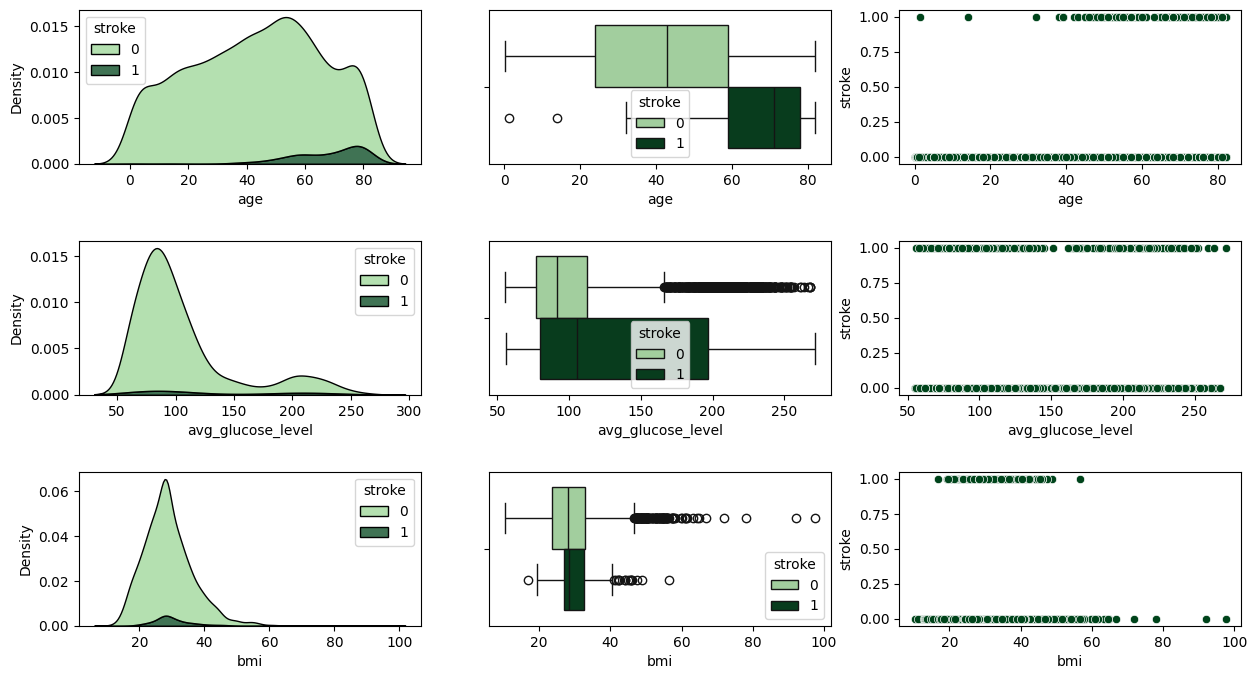

In [26]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
palette = {
    0: '#9bd696',
    1: '#00441b'
}
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=df1, multiple='stack', ax=ax[i,0], palette=palette)
    sns.boxplot(x=num_col, data=df1, ax=ax[i, 1], palette=palette, hue="stroke",)
    sns.scatterplot(x=num_col, y='stroke', data=df1, ax=ax[i, 2], color="#00441b")
    i+=1
plt.show()

In [90]:
#Created categorical columns
categorical_columns = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status", "stroke"]

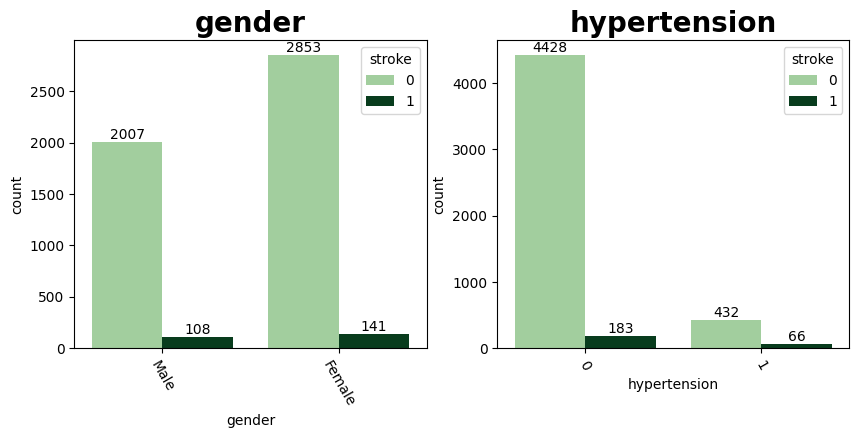

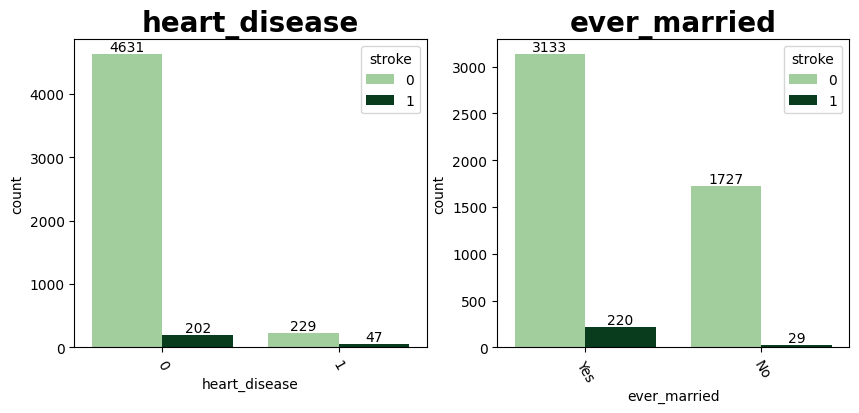

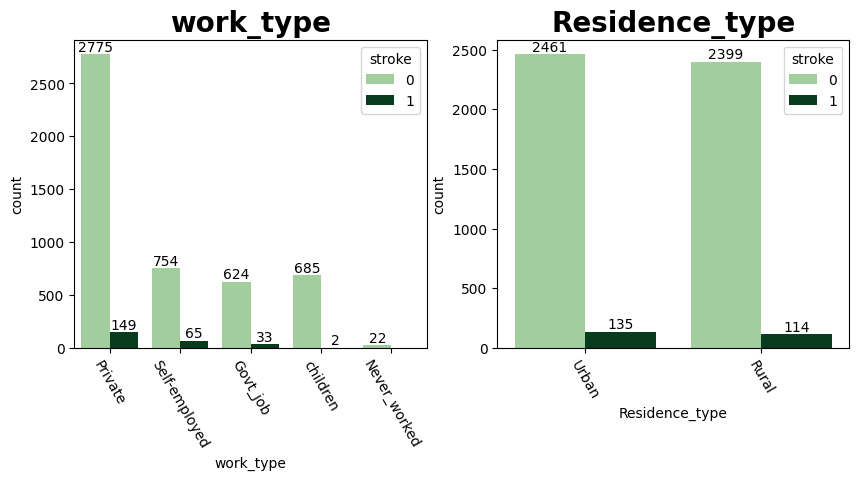

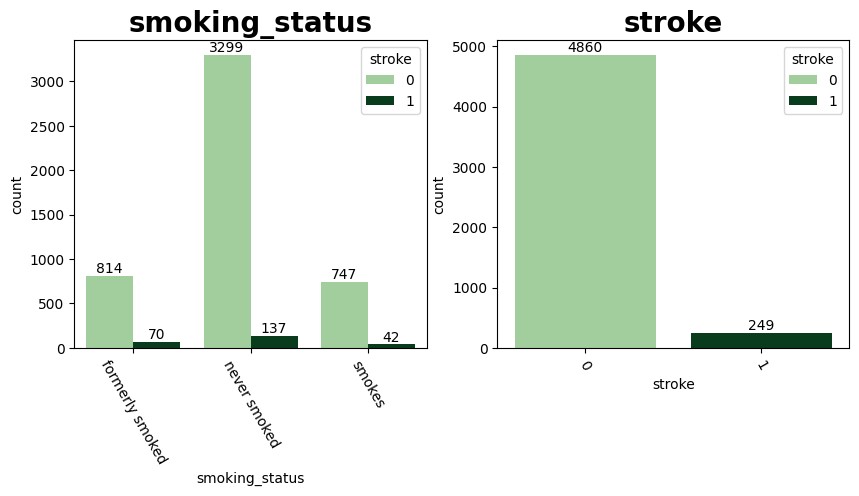

In [28]:
#visualization of comparision of category vs stroke occured

i = 0
while i < 8:
    fig = plt.figure(figsize=(10, 4))
    colors = ['#9bd696', '#00441b']

    # Left subplot
    plt.subplot(1, 2, 1)
    plt.title(categorical_columns[i], size=20, weight='bold', color='black')
    ax1 = sns.countplot(x=categorical_columns[i], data=df1, palette=colors, hue="stroke")
    for c in ax1.containers:
        ax1.bar_label(c)
    ax1.tick_params(axis='x', rotation=300)
    i += 1

    # Right subplot
    plt.subplot(1, 2, 2)
    plt.title(categorical_columns[i], size=20, weight='bold', color='black')
    ax2 = sns.countplot(x=categorical_columns[i], data=df1, palette=colors, hue="stroke")
    for c in ax2.containers:
        ax2.bar_label(c)
    ax2.tick_params(axis='x', rotation=300)
    i += 1

    plt.show()

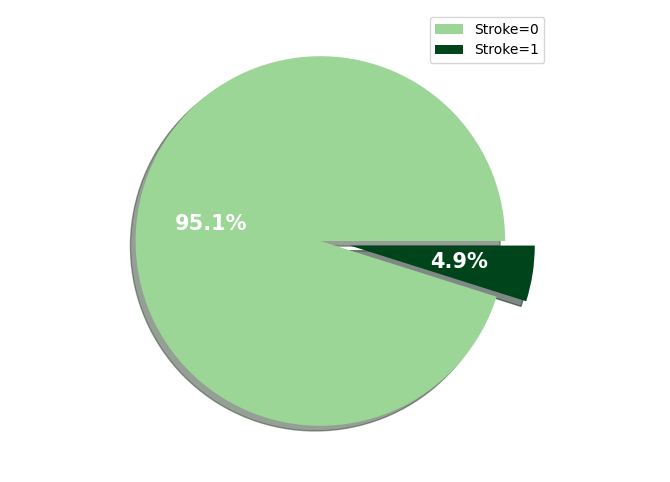

In [29]:
#visualization in the form of a piechart

x = df1['stroke'].value_counts()
explode = [0, 0.1618]             # to pullout the minority class slice
labels = ['Stroke=0', 'Stroke=1']
colors = ['#9bd696', '#00441b']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

In [30]:
#visualization in the form of heatmap

num_cols = ['age', 'hypertension', 'heart_disease',
            'avg_glucose_level', 'bmi', 'stroke']


In [31]:
corr = df1[num_cols].corr()


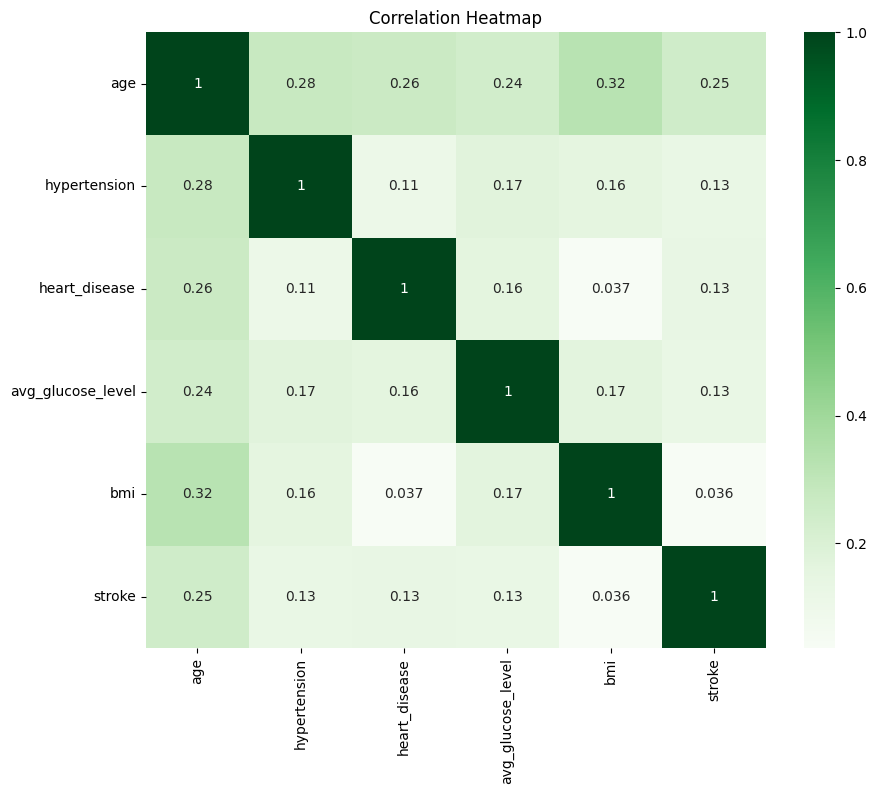

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

##**Conclusion of Heatmap:**
---
The correlation heatmap shows that age has the strongest positive association with stroke, followed by hypertension, heart disease, and average glucose level.
BMI shows minimal correlation.
Overall, no single feature strongly correlates with stroke, indicating that stroke risk arises from the combined effect of multiple weak-to-moderate factors.

In [33]:
df2 = df1.copy()

In [34]:
#converted categorical data into numerical data for better understanding of ML models
#why drop_first? -> because it will prevent from generating redundant copy, and to avoid confusion in ML models

cat_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
df2 = pd.get_dummies(df2, columns=cat_columns, drop_first=True)

In [35]:
df2.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,False,False
1,51676,61.0,0,0,202.21,27.8,1,False,True,False,False,True,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,1,True,True,False,True,False,False,True,False,False
6,53882,74.0,1,1,70.09,27.4,1,True,True,False,True,False,False,False,True,False
7,10434,69.0,0,0,94.39,22.8,1,False,False,False,True,False,False,True,True,False
8,27419,59.0,0,0,76.15,27.8,1,False,True,False,True,False,False,False,True,False
9,60491,78.0,0,0,58.57,24.2,1,False,True,False,True,False,False,True,True,False


In [36]:
#here we are doing scaling a.k.a standardization
#because many models like Logistic Regression, KNN perform better when data is scaled.
#we find the mean -> then find how much difference is each data from the mean -> then divide that with the mean -> we get the standardized value

num_cols = ["age", "avg_glucose_level", "bmi"]

# scaler = StandardScaler()
# df2[num_cols] = scaler.fit_transform(df2[num_cols])




In [37]:
print(df2.isnull().sum())

id                             0
age                            0
hypertension                   0
heart_disease                  0
avg_glucose_level              0
bmi                            0
stroke                         0
gender_Male                    0
ever_married_Yes               0
work_type_Never_worked         0
work_type_Private              0
work_type_Self-employed        0
work_type_children             0
Residence_type_Urban           0
smoking_status_never smoked    0
smoking_status_smokes          0
dtype: int64


In [38]:
# #saving the cleaned dataset
df_clean = df2.copy()
df_clean.to_csv("/content/drive/MyDrive/FSP_ML/Datasets/stroke_cleaned.csv", index=False)
print("Cleaned file saved as stroke_cleaned.csv")

Cleaned file saved as stroke_cleaned.csv


##**Training & Testing Data**

In [39]:
df3 = df2.copy()

In [40]:
df3.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,False,False
1,51676,61.0,0,0,202.21,27.8,1,False,True,False,False,True,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,True,False


In [41]:
#preparing training and testing dataset for Logistic regression
from sklearn.model_selection import train_test_split

X = df3.drop(columns=["stroke", "id"])
y = df3["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size = 0.2,
    stratify=y,       #both the train and test dataset must have same proportion of stroke=0 & stroke=1
    random_state=42
)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4087, 14) (1022, 14) (4087,) (1022,)


In [43]:
#checking stroke proportion using normalization

print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))      #100   80+20 |  training= 64+16=80      test= 16+4=20
#0.8 + 0.2 = 1          0.8+0.2         0.8+0.2

stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64
stroke
0    0.951309
1    0.048691
Name: proportion, dtype: float64
stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


###**Freezing the scaler:**

In [44]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [45]:
joblib.dump(scaler, "/content/drive/MyDrive/FSP_ML/Models/scaler.pkl")

['/content/drive/MyDrive/FSP_ML/Models/scaler.pkl']

###**Scaling the Training data, Test data**

In [46]:
X_train_scaled = X_train.copy()
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled = X_test.copy()
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

##**Logistic Regression:**

In [91]:
#training logic-regression
from sklearn.linear_model import LogisticRegression


**what does random_state mean?**

*   Same starting point every time
*   Same result every run
*   Easy to compare models

**Why only 42?**

No special ML meaning.
It’s a popular convention (from The Hitchhiker’s Guide to the Galaxy).

In [48]:
log_reg = LogisticRegression(
    max_iter = 1000,      #max number of steps LR model allowed to take to learn/ also called convergence
    class_weight = "balanced",    #gives more importance to stroke = 1, because it is rare
    random_state = 42
)

In [49]:
#train the model
# log_reg.fit(X_train, y_train)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [50]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [51]:
log_reg.n_features_in_

14

In [52]:
log_reg.coef_.shape


(1, 14)

In [53]:
log_reg.intercept_
log_reg.coef_


array([[ 1.88055116,  0.59528126,  0.16473451,  0.21001815,  0.05191066,
        -0.1262413 , -0.16656777, -0.07922618,  0.02162234, -0.22604737,
         0.96504622,  0.17959783, -0.24283393,  0.19454193]])

In [54]:
X_train_scaled.columns


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [55]:
#evaluating the model

print("Confusion Matrix")
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)

print("Classification Report")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix
[[713 259]
 [ 10  40]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

ROC-AUC Score: 0.8389917695473251


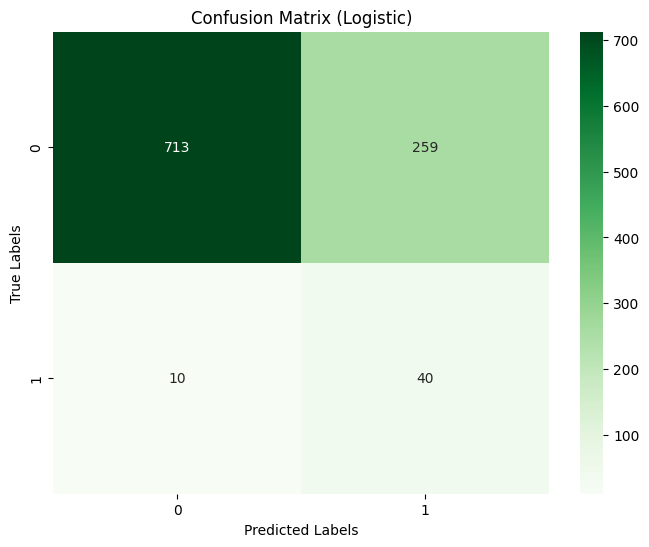

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Logistic)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###**Freezing the Logistic Model: (.pkl)**

In [57]:
joblib.dump(log_reg, "/content/drive/MyDrive/FSP_ML/Models/Logistic Reg./stroke_logistic_model3.pkl")

['/content/drive/MyDrive/FSP_ML/Models/Logistic Reg./stroke_logistic_model3.pkl']

In [58]:
# scaler = StandardScaler()
# scaler.fit(X_train[num_cols])

In [59]:
# joblib.dump(scaler, "/content/drive/MyDrive/FSP_ML/Models/scaler.pkl")

In [60]:
scaler.n_features_in_

3

###**Conclusion:**
Model is good for baseline medical model, but precision for stroke is low, too many false positives (FP)

##**KNN:**

In [61]:
df4 = df2.copy()
df4.drop(columns=['id'], inplace=True)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance'
)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [65]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix")
print(cm_knn)

print("\nClassification Report")
print(classification_report(y_test, y_pred_knn))

print("ROC-AUC Score: ", roc_auc_score(y_test, y_prob_knn))

Confusion Matrix
[[961  11]
 [ 49   1]]

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.08      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.52      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022

ROC-AUC Score:  0.6516049382716049


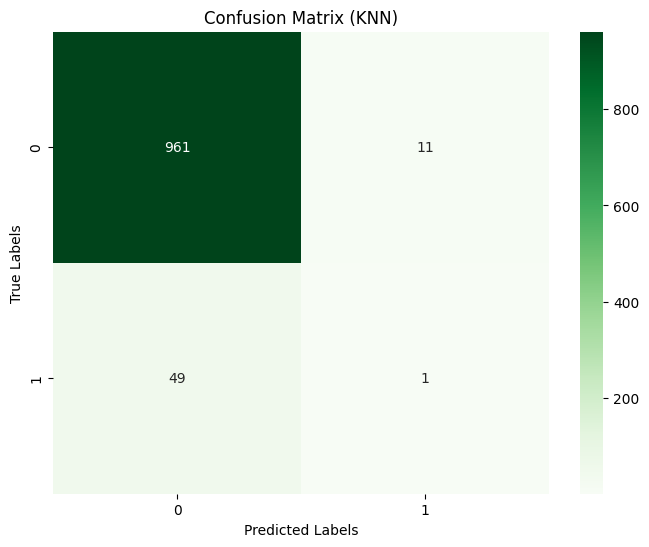

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###**Freezing the KNN Model: (.pkl)**

In [68]:
joblib.dump(knn, "/content/drive/MyDrive/FSP_ML/Models/KNN/stroke_knn_model.pkl")

['/content/drive/MyDrive/FSP_ML/Models/KNN/stroke_knn_model.pkl']

###**Conclusion:**
Although KNN achieved high accuracy, it performed very poorly for stroke detection with a recall of only 2%. Due to severe class imbalance, KNN tends to favor the majority class and misses most stroke cases, making it unsuitable for this medical prediction task.

###**KNN was NOT suitable for the dataset because:**

* Extremely low stroke recall (≈ 2%)
* Very high number of missed stroke cases (false negatives)
* Strong bias toward the majority class due to class imbalance
* High accuracy was misleading and did not reflect real performance
* Poor ROC-AUC, indicating weak class separation
* Distance-based voting failed to detect rare stroke patterns
* Not reliable for medical screening tasks

##**Decision Tree**

In [69]:
dt = DTC(
    criterion = 'gini',
    max_depth = 5,
    class_weight = 'balanced',
    random_state = 42,
)

In [70]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [71]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [72]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(cm_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Confusion Matrix:
[[683 289]
 [ 12  38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       972
           1       0.12      0.76      0.20        50

    accuracy                           0.71      1022
   macro avg       0.55      0.73      0.51      1022
weighted avg       0.94      0.71      0.79      1022

ROC-AUC Score: 0.7798765432098765


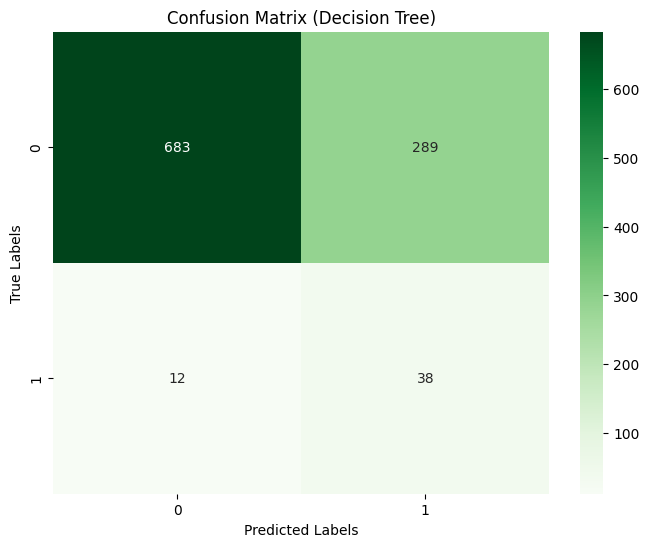

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###**Freezing the Desision Tree Model: (.pkl)**

In [74]:
joblib.dump(dt, "/content/drive/MyDrive/FSP_ML/Models/Decision_Tree/stroke_dt_model.pkl")

['/content/drive/MyDrive/FSP_ML/Models/Decision_Tree/stroke_dt_model.pkl']

###**Conclusion:**

####**Logistic Regression is BETTER than Decision Tree for the dataset because:**
---
* Higher stroke recall
* Fewer missed stroke cases
* Better ROC-AUC
* More reliable medical screening behavior

##**Random Forest:**

In [75]:
rf = RFC(
    n_estimators = 200,
    max_depth = 8,
    min_samples_split = 10,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1,
)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [77]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [78]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Confusion Matrix:
[[835 137]
 [ 21  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       972
           1       0.17      0.58      0.27        50

    accuracy                           0.85      1022
   macro avg       0.58      0.72      0.59      1022
weighted avg       0.94      0.85      0.88      1022

ROC-AUC Score: 0.804835390946502


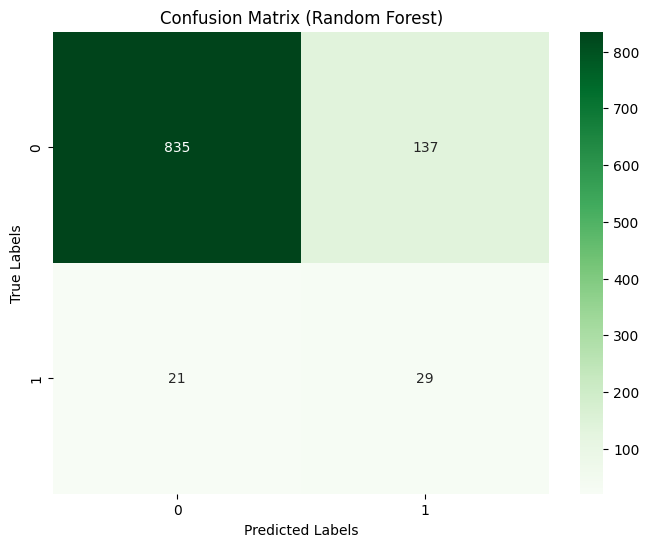

In [79]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###**Freezing the Random Forest Model: (.pkl)**

In [80]:
joblib.dump(dt, "/content/drive/MyDrive/FSP_ML/Models/Random_Forest/stroke_rf_model.pkl")

['/content/drive/MyDrive/FSP_ML/Models/Random_Forest/stroke_rf_model.pkl']

###**Conclusion:**

###**Random Forest was NOT selected as the final model because:**

* Stroke recall remained moderate despite tuning
* Higher number of missed stroke cases
* Increasing trees improved stability but not minority detection
* Class weighting caused overly strict decision rules
* Did not outperform Logistic Regression on medical priorities

##**SVC: Support Vector Classification**

In [81]:
svc = SVC(
    kernel='linear',
    class_weight='balanced',
    probability=True,
    random_state=42
)

In [82]:
svc.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)

In [83]:
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)[:, 1]

In [84]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(cm_svc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svc))

Confusion Matrix:
[[696 276]
 [ 10  40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.80      0.22        50

    accuracy                           0.72      1022
   macro avg       0.56      0.76      0.52      1022
weighted avg       0.94      0.72      0.80      1022

ROC-AUC Score: 0.8377366255144033


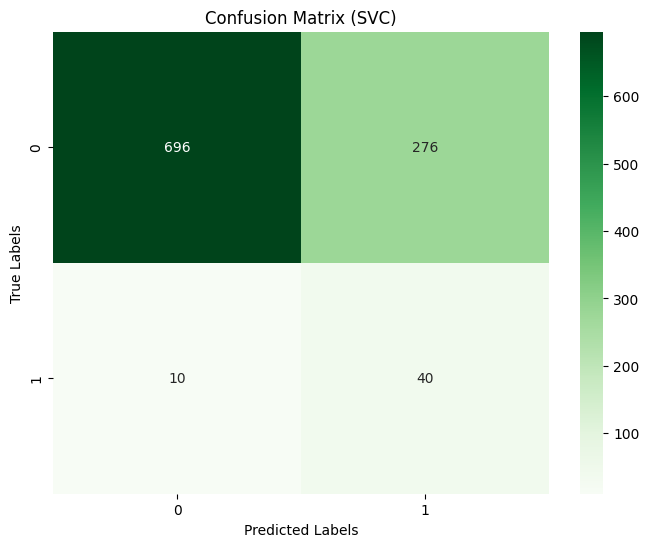

In [85]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (SVC)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###**Freezing the SVC Model: (.pkl)**

In [86]:
joblib.dump(dt, "/content/drive/MyDrive/FSP_ML/Models/SVC/stroke_svc_model.pkl")

['/content/drive/MyDrive/FSP_ML/Models/SVC/stroke_svc_model.pkl']

###**SVC performed similarly to Logistic Regression because:**

* Stroke risk patterns are largely linearly separable
* Margin-based classification captured similar decision boundaries
* Achieved high stroke recall (80%)
* ROC-AUC are comparable to Logistic Regression
* It did not offer additional benefit in interpretability or deployment

/tmp/ipython-input-706638279.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


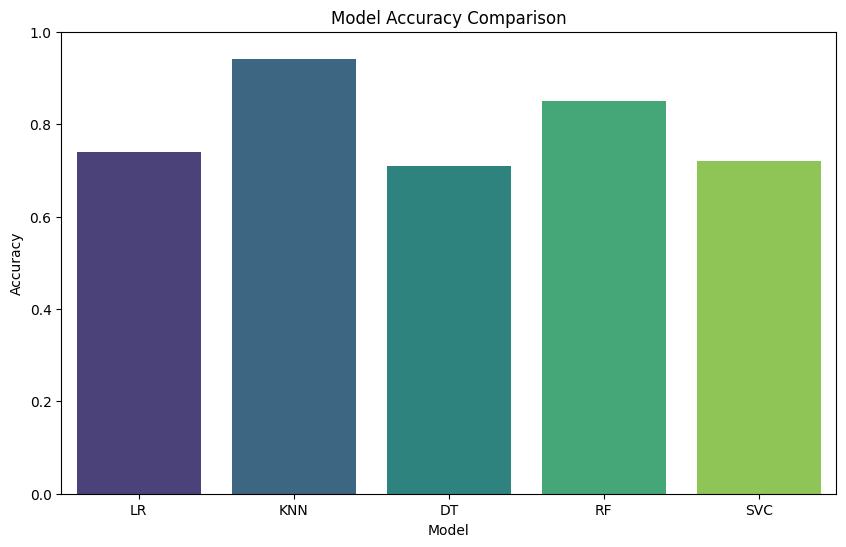

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Create a dictionary of your results
results = {
    'Model': ['LR', 'KNN', 'DT', 'RF', 'SVC'],
    'Accuracy': [0.74, 0.94, 0.71, 0.85, 0.72]
}

df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1.0) # Ensure the y-axis shows the full range
plt.show()